In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
import gmaps

# Census & gmaps API Keys
from config import (census_key, google_key)
c = Census(census_key, year=2016)

# Configure gmaps
gmaps.configure(api_key=google_key)

In [4]:
# The path to our CSV file
csv_path = "merged_file.csv"
result_df = pd.read_csv(csv_path)

result_df

,Unnamed: 0,State,State Abbr,County,DEM Votes,GOP Votes,Total Votes,DEM %,GOP %,Total Population,...,Education (Bachelors),Education (Masters),Education (Professional),Education (Doctorate),Median Income,Income Per Capita,Median Home Value,Pop in Labor Force,Pop Not in Labor Force,Unemployed
0,0,Indiana,IN,Adams County,2802,9642,13039,0.214894,0.739474,34813.0,...,2311.0,768.0,126.0,64.0,47572.0,21173.0,114600.0,15975.0,8948.0,872.0
1,1,Indiana,IN,Allen County,55222,83801,145787,0.378785,0.574818,365565.0,...,42160.0,16367.0,4152.0,1694.0,49574.0,26058.0,116400.0,186706.0,93216.0,13152.0
2,2,Indiana,IN,Bartholomew County,9841,20637,32389,0.303838,0.637161,80203.0,...,9685.0,5255.0,499.0,632.0,55874.0,28631.0,137500.0,41710.0,21169.0,2165.0
3,3,Indiana,IN,Benton County,860,2579,3654,0.235359,0.705802,8709.0,...,753.0,188.0,42.0,12.0,48069.0,23181.0,81500.0,4368.0,2364.0,201.0
4,4,Indiana,IN,Blackford County,1243,3349,4822,0.257777,0.694525,12364.0,...,546.0,315.0,51.0,42.0,38791.0,21980.0,67100.0,5763.0,4263.0,480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,87,Indiana,IN,Washington County,2636,8206,11333,0.232595,0.724080,27792.0,...,1399.0,865.0,76.0,70.0,44883.0,22096.0,104600.0,13035.0,8910.0,1128.0
88,88,Indiana,IN,Wayne County,8322,16028,25575,0.325396,0.626706,67423.0,...,4611.0,2511.0,387.0,408.0,39691.0,22227.0,94300.0,30948.0,23288.0,2257.0
89,89,Indiana,IN,Wells County,2585,9999,13123,0.196982,0.761945,27836.0,...,2219.0,804.0,168.0,68.0,51568.0,24544.0,118800.0,14115.0,7669.0,533.0
90,90,Indiana,IN,White County,2563,6813,9902,0.258837,0.688043,24265.0,...,1730.0,788.0,84.0,25.0,51547.0,25859.0,106600.0,12026.0,7269.0,652.0


In [5]:
# The path to our CSV file
csv_path = "indiana_census2.csv"
census_df = pd.read_csv(csv_path)

census_df

,Unnamed: 0,County,State,Median Income,Income Per Capita,Pop in Labor Force,Pop not in Labor Force,Unemployed,Median Age,Median Age (male),Median Age (female)
0,759,Adams County,Indiana,47572.0,21173.0,15975.0,8948.0,872.0,33.7,32.0,36.0
1,760,Allen County,Indiana,49574.0,26058.0,186706.0,93216.0,13152.0,35.6,34.6,36.7
2,761,Bartholomew County,Indiana,55874.0,28631.0,41710.0,21169.0,2165.0,37.9,36.4,39.1
3,762,Benton County,Indiana,48069.0,23181.0,4368.0,2364.0,201.0,40.5,37.4,42.5
4,763,Blackford County,Indiana,38791.0,21980.0,5763.0,4263.0,480.0,43.4,42.1,45.8
...,...,...,...,...,...,...,...,...,...,...,...
87,846,Washington County,Indiana,44883.0,22096.0,13035.0,8910.0,1128.0,41.0,39.8,43.1
88,847,Wayne County,Indiana,39691.0,22227.0,30948.0,23288.0,2257.0,40.9,39.3,42.7
89,848,Wells County,Indiana,51568.0,24544.0,14115.0,7669.0,533.0,40.7,38.5,42.3
90,849,White County,Indiana,51547.0,25859.0,12026.0,7269.0,652.0,42.3,41.0,43.7


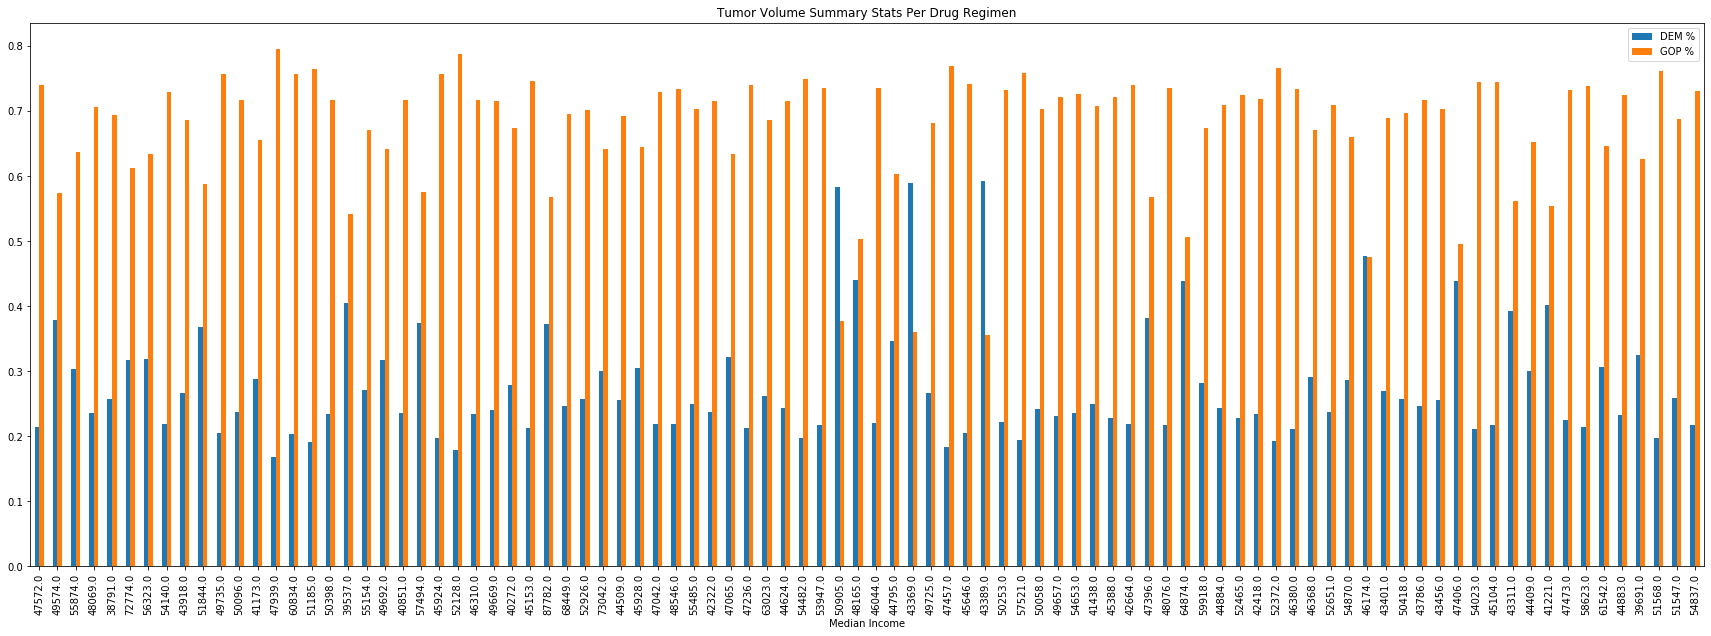

<Figure size 432x288 with 0 Axes>

In [10]:
income_vote_share = result_df[['County', 'DEM %', 'GOP %', 'Median Income']]
income_vote_share.plot(x='Median Income', kind='bar',width=0.5, figsize=(30,10))

# Set a title for the chart
plt.title("Vote Percentage Stats Per Median Income")

plt.show()
plt.tight_layout()

In [ ]:
income_vote_share = result_df[['County', 'DEM %', 'GOP %', 'Median Income']]
income_vote_share.plot(x='Median Income', kind='bar',width=0.5, figsize=(30,10))

# Set a title for the chart
plt.title("Tumor Volume Summary Stats Per Drug Regimen")

plt.show()
plt.tight_layout()